# ITS307 Data Analytics : Spring Semester 2022
# Assignment II_12190052
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

# 2. Loading and Cleaning with Pandas

In [2]:
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

In [3]:
train_data.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [4]:
train_data.shape

(6019, 14)

There are 14 columns in the dataset out of which we have 13 features. One target column "Price" which is our dependent variable.

In [5]:
test_data.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [6]:
test_data.shape

(1234, 13)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [8]:
train_data.describe()

Unnamed: 0         Year  Kilometers_Driven        Seats        Price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   3009.000000  2013.358199       5.873838e+04     5.278735     9.479468
std    1737.679967     3.269742       9.126884e+04     0.808840    11.187917
min       0.000000  1998.000000       1.710000e+02     0.000000     0.440000
25%    1504.500000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3009.000000  2014.000000       5.300000e+04     5.000000     5.640000
75%    4513.500000  2016.000000       7.300000e+04     5.000000     9.950000
max    6018.000000  2019.000000       6.500000e+06    10.000000   160.000000

In [9]:
train_data = train_data.drop(['Unnamed: 0'],axis=1)
test_data = test_data.drop(['Unnamed: 0'],axis=1)
train_data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

In [10]:
col_null = train_data.isnull().sum()
col_list = train_data.columns.values
col_list

array(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'], dtype=object)

In [11]:
#percentage of missing vales in each feature.
missing_values = {'Feature':[],'Missing %':[]}
for i in range(len(col_list)):
    missing_values.get('Feature').append(col_list[i])
    missing_values.get('Missing %').append((col_null[i]/train_data.shape[0])*100)
pd.DataFrame(missing_values)

Feature  Missing %
0                Name   0.000000
1            Location   0.000000
2                Year   0.000000
3   Kilometers_Driven   0.000000
4           Fuel_Type   0.000000
5        Transmission   0.000000
6          Owner_Type   0.000000
7             Mileage   0.033228
8              Engine   0.598106
9               Power   0.598106
10              Seats   0.697790
11          New_Price  86.310018
12              Price   0.000000

In [12]:
train_data.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [13]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [14]:
# as the New_Price column have many missing values we drop the column
train_data = train_data.drop(['New_Price'],axis=1)
test_data = test_data.drop(['New_Price'],axis=1)
train_data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [15]:
train_data.shape

(6019, 12)

In [16]:
test_data.shape

(1234, 11)

In [17]:
train_data.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

# 3.  EDA and Visualization

In [18]:
train_data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [19]:
test_data.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats  
0   58.2 bhp    4.0  
1   47.3 bhp    5.0  
2  147.8 bhp    7.0  
3   null bhp    5.0  
4  82.85 bhp    5.0

<AxesSubplot:>

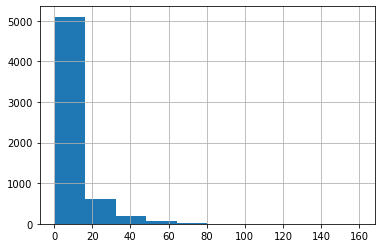

In [20]:
train_data["Price"].hist()

(array([ 169.,  697., 1706., 1683.,  718.,  475.,  370.,  160.,   38.,
           3.]),
 array([0.36464311, 0.83631924, 1.30799536, 1.77967149, 2.25134761,
        2.72302374, 3.19469986, 3.66637599, 4.13805211, 4.60972824,
        5.08140436]),
 <BarContainer object of 10 artists>)

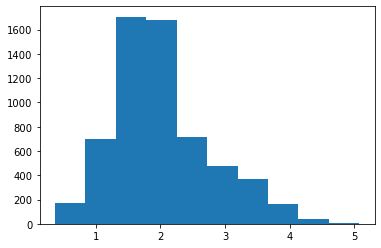

In [21]:
plt.hist(np.log1p(train_data["Price"]))

In [22]:
train_data["Engine"].str[-3:].value_counts()

 CC    5983
Name: Engine, dtype: int64

In [23]:
test_data["Engine"].str[-3:].value_counts()

 CC    1224
Name: Engine, dtype: int64

<AxesSubplot:>

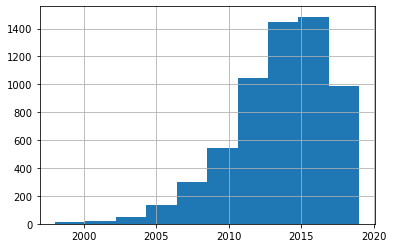

In [24]:
train_data["Year"].hist()

### 3.1. Popular Brands of Used Cars Offered for Sale.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


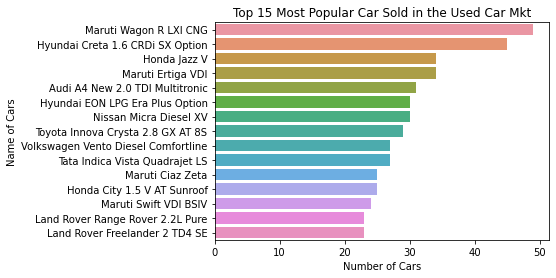

In [25]:
x = train_data.Name.unique()[:15]
y = train_data.Name.value_counts()[:15]
sns.barplot(y,x,data=train_data,orient='h')
plt.title('Top 15 Most Popular Car Sold in the Used Car Mkt')
plt.xlabel('Number of Cars')
plt.ylabel('Name of Cars')
plt.show()

### 3.2. Popular Fuel of Used Cars Offered for Sale.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


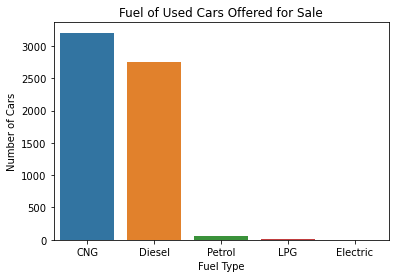

In [26]:
x = train_data.Fuel_Type.unique()
y = train_data.Fuel_Type.value_counts()
sns.barplot(x,y,data=train_data)
plt.title('Fuel of Used Cars Offered for Sale')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.show()

# 4. Feature Engineering 

In [27]:
# Removing the outliers
train_data = train_data[train_data['Fuel_Type'] != 'Electric']
train_data.shape

(6017, 12)

In [28]:
train_data.Kilometers_Driven.min()

171

In [29]:
train_data.Kilometers_Driven.max()

6500000

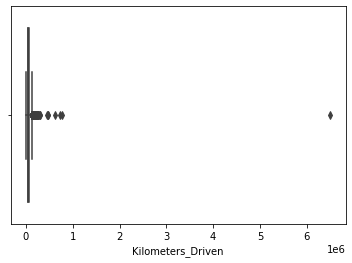

In [30]:
# Checking outliers using box and wisker plot
sns.boxplot(x=train_data['Kilometers_Driven'])
plt.show()

In [31]:
# IQR and upper limit and lower limit 
Q1 = train_data.Kilometers_Driven.quantile(0.25)
Q3 = train_data.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print(IQR)
print(upperlimit)
print(lowerlimit)

39000.0
131500.0
-24500.0


In [32]:
# outlier
train_data[(train_data.Kilometers_Driven < lowerlimit)  | (train_data.Kilometers_Driven > upperlimit)]

Name    Location  Year  \
29       Toyota Innova 2.5 V Diesel 7-seater      Mumbai  2007   
64                        Tata Indica V2 eLS     Chennai  2016   
77                      Toyota Innova 2.0 G1     Chennai  2006   
154      Skoda Superb Elegance 2.0 TDI CR AT        Pune  2012   
164        Ford Ecosport 1.5 DV5 MT Ambiente       Kochi  2014   
...                                      ...         ...   ...   
5852    Toyota Innova 2.5 G4 Diesel 8-seater     Chennai  2008   
5871  Ford Endeavour 4x2 XLT Limited Edition        Pune  2009   
5914          Skoda Octavia Elegance 1.9 TDI   Hyderabad  2003   
5953                    Ford Figo Diesel EXI      Jaipur  2012   
5957                      Honda City 1.5 EXI  Coimbatore  2004   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type    Mileage  \
29               262000    Diesel       Manual  Fourth & Above  12.8 kmpl   
64               178000    Diesel       Manual           First  25.0 kmpl   
77               230000    Petrol       Manual           Third  12.4 kmpl   
154              136997    Diesel    Automatic           First  17.2 kmpl   
164              147898    Diesel       Manual           First  22.7 kmpl   
...                 ...       ...          ...             ...        ...   
5852             192000    Diesel       Manual           First  12.8 kmpl   
5871             180000    Diesel       Manual           First  10.9 kmpl   
5914             132000    Diesel       Manual           First  18.7 kmpl   
5953             140000    Diesel       Manual           First  20.0 kmpl   
5957             186679    Petrol       Manual          Second  13.0 kmpl   

       Engine      Power  Seats  Price  
29    2494 CC    102 bhp    7.0   4.00  
64    1396 CC     69 bhp    5.0   2.50  
77    1998 CC    132 bhp    8.0   4.50  
154   1968 CC  138.1 bhp    5.0   8.50  
164   1498 CC  89.84 bhp    5.0   4.42  
...       ...        ...    ...    ...  
5852  2494 CC    102 bhp    8.0   6.85  
5871  2499 CC    143 bhp    7.0   7.50  
5914  1896 CC     66 bhp    5.0   2.25  
5953  1399 CC     68 bhp    5.0   2.51  
5957  1493 CC    100 bhp    5.0   1.76  

[202 rows x 12 columns]

In [33]:
# deleting the rows which are greater than upperlimit and lower then lowerlimit
train_data = train_data[(train_data.Kilometers_Driven > lowerlimit) & (train_data.Kilometers_Driven < upperlimit)]
train_data.shape

(5815, 12)

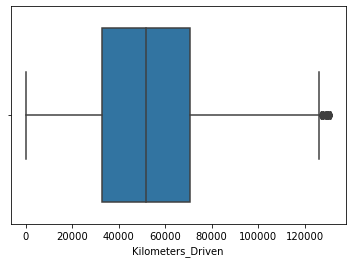

In [34]:
# ploting boxplot to check outliers are removed or not
sns.boxplot(x=train_data['Kilometers_Driven'])
plt.show()

In [35]:
# group by car brand by modifying their names
#keepung the first name of the cars
train_data.Name = train_data .Name.str.split().str.get(0)
test_data.Name = test_data.Name.str.split().str.get(0)

In [36]:
train_data.head()

Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti      Mumbai  2010              72000       CNG       Manual   
1  Hyundai        Pune  2015              41000    Diesel       Manual   
2    Honda     Chennai  2011              46000    Petrol       Manual   
3   Maruti     Chennai  2012              87000    Diesel       Manual   
4     Audi  Coimbatore  2013              40670    Diesel    Automatic   

  Owner_Type     Mileage   Engine      Power  Seats  Price  
0      First  26.6 km/kg   998 CC  58.16 bhp    5.0   1.75  
1      First  19.67 kmpl  1582 CC  126.2 bhp    5.0  12.50  
2      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   4.50  
3      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   6.00  
4     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0  17.74

In [37]:
train_data.Name.value_counts()

Maruti           1187
Hyundai          1087
Honda             599
Toyota            344
Mercedes-Benz     316
Volkswagen        310
Ford              285
BMW               262
Mahindra          259
Audi              235
Tata              170
Skoda             166
Renault           141
Chevrolet         117
Nissan             88
Land               59
Jaguar             40
Mini               26
Fiat               25
Mitsubishi         23
Volvo              20
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Name, dtype: int64

In [38]:
# Removing outliers in car brands
train_data = train_data[train_data['Name'] != 'Force']
train_data = train_data[train_data['Name'] != 'ISUZU']
train_data = train_data[train_data['Name'] != 'Bentley']
train_data = train_data[train_data['Name'] != 'Lamborghini']
train_data = train_data[train_data['Name'] != 'Isuzu']
train_data = train_data[train_data['Name'] != 'Smart']
train_data = train_data[train_data['Name'] != 'Ambassador']
train_data.shape

(5805, 12)

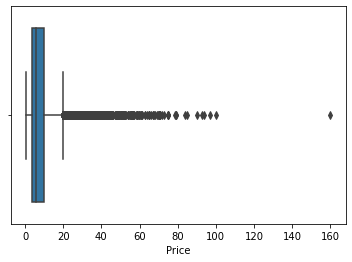

In [39]:
# Ploting boxplot to check outliers in Price
sns.boxplot(x=train_data['Price'])
plt.show()

In [40]:
# IQR and upper limit and lower limit 
Q1 = train_data.Price.quantile(0.25)
Q3 = train_data.Price.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print(IQR)
print(upperlimit)
print(lowerlimit)

6.5
19.75
-6.25


In [41]:
# outlier
train_data[(train_data.Price < lowerlimit)  | (train_data.Price > upperlimit)]

Name   Location  Year  Kilometers_Driven Fuel_Type  \
13             Land      Delhi  2014              72000    Diesel   
19    Mercedes-Benz  Bangalore  2014              78500    Diesel   
22             Audi     Mumbai  2015              55985    Petrol   
38    Mercedes-Benz       Pune  2013              85000    Diesel   
50             Audi      Kochi  2015              13648    Diesel   
...             ...        ...   ...                ...       ...   
5946            BMW  Bangalore  2016              16000    Diesel   
5950           Audi  Bangalore  2014              65630    Diesel   
5970  Mercedes-Benz      Kochi  2018              17773    Petrol   
5996         Jaguar      Kochi  2016              31150    Diesel   
6008        Porsche  Hyderabad  2013              40000    Diesel   

     Transmission Owner_Type     Mileage   Engine       Power  Seats  Price  
13      Automatic      First   12.7 kmpl  2179 CC   187.7 bhp    5.0  27.00  
19      Automatic      First  14.84 kmpl  2143 CC  167.62 bhp    5.0  28.00  
22      Automatic      First  13.53 kmpl  1984 CC  177.01 bhp    5.0  23.50  
38      Automatic      First  11.74 kmpl  2987 CC   254.8 bhp    5.0  28.00  
50      Automatic      First  17.11 kmpl  1968 CC  174.33 bhp    5.0  21.43  
...           ...        ...         ...      ...         ...    ...    ...  
5946    Automatic      First  14.69 kmpl  2993 CC     258 bhp    5.0  48.00  
5950    Automatic      First  15.73 kmpl  1968 CC  174.33 bhp    5.0  21.75  
5970    Automatic      First   13.7 kmpl  1991 CC     183 bhp    5.0  26.76  
5996    Automatic      First  16.36 kmpl  2179 CC   187.7 bhp    5.0  30.54  
6008    Automatic     Second  17.85 kmpl  2967 CC     300 bhp    4.0  45.00  

[707 rows x 12 columns]

In [42]:
# remove rows containing price beyond lower and upper limit.
train_data = train_data[(train_data.Price > lowerlimit) & (train_data.Price < upperlimit)]
train_data.shape

(5094, 12)

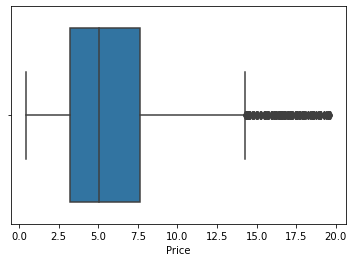

In [43]:
# ploting boxplot
sns.boxplot(x=train_data['Price'])
plt.show()

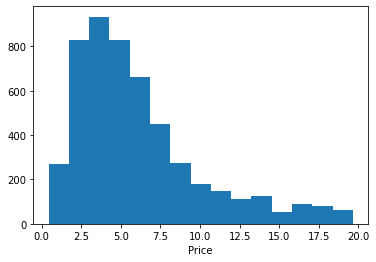

In [44]:
plt.hist(train_data.Price,bins=15)
plt.xlabel("Price")
plt.show()

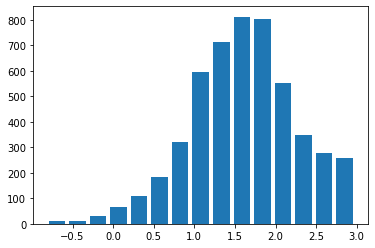

In [45]:
# Apply log transformation
x = np.log(train_data['Price'])
plt.hist(x,bins=15,rwidth=0.8)
plt.show()

In [46]:
# Converting Mileage, Engine and Power to numerical columns
train_data.Mileage = train_data.Mileage.str.split().str.get(0).astype('float')
train_data.Engine = train_data.Engine.str.split().str.get(0).astype('int', errors='ignore')
train_data.Power = train_data.Power.str.split().str.get(0).astype('float', errors='ignore')

test_data.Mileage = test_data.Mileage.str.split().str.get(0).astype('float')
test_data.Engine = test_data.Engine.str.split().str.get(0).astype('int', errors='ignore')
test_data.Power = test_data.Power.str.split().str.get(0).astype('float', errors='ignore')
train_data.head()

Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti      Mumbai  2010              72000       CNG       Manual   
1  Hyundai        Pune  2015              41000    Diesel       Manual   
2    Honda     Chennai  2011              46000    Petrol       Manual   
3   Maruti     Chennai  2012              87000    Diesel       Manual   
4     Audi  Coimbatore  2013              40670    Diesel    Automatic   

  Owner_Type  Mileage Engine  Power  Seats  Price  
0      First    26.60    998  58.16    5.0   1.75  
1      First    19.67   1582  126.2    5.0  12.50  
2      First    18.20   1199   88.7    5.0   4.50  
3      First    20.77   1248  88.76    7.0   6.00  
4     Second    15.20   1968  140.8    5.0  17.74

In [47]:
# age of the car
train_data['Age'] = 2020 - train_data['Year']
test_data['Age'] = 2020 - test_data['Year']
train_data.head()

Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti      Mumbai  2010              72000       CNG       Manual   
1  Hyundai        Pune  2015              41000    Diesel       Manual   
2    Honda     Chennai  2011              46000    Petrol       Manual   
3   Maruti     Chennai  2012              87000    Diesel       Manual   
4     Audi  Coimbatore  2013              40670    Diesel    Automatic   

  Owner_Type  Mileage Engine  Power  Seats  Price  Age  
0      First    26.60    998  58.16    5.0   1.75   10  
1      First    19.67   1582  126.2    5.0  12.50    5  
2      First    18.20   1199   88.7    5.0   4.50    9  
3      First    20.77   1248  88.76    7.0   6.00    8  
4     Second    15.20   1968  140.8    5.0  17.74    7

In [48]:
# Log function to normalise price
train_data.Price = np.log1p(train_data.Price)

In [49]:
# label encoding for categorical data set
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [50]:
train_data['Name'] = label_encoder.fit_transform(train_data['Name'])
train_data['Location'] = label_encoder.fit_transform(train_data['Location'])
train_data['Fuel_Type'] = label_encoder.fit_transform(train_data['Fuel_Type'])
train_data['Transmission'] = label_encoder.fit_transform(train_data['Transmission'])
train_data['Owner_Type'] = label_encoder.fit_transform(train_data['Owner_Type'])


test_data['Name'] = label_encoder.fit_transform(test_data['Name'])
test_data['Location'] = label_encoder.fit_transform(test_data['Location'])
test_data['Fuel_Type'] = label_encoder.fit_transform(test_data['Fuel_Type'])
test_data['Transmission'] = label_encoder.fit_transform(test_data['Transmission'])
test_data['Owner_Type'] = label_encoder.fit_transform(test_data['Owner_Type'])

train_data.head()

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0    12         9  2010              72000          0             1   
1     7        10  2015              41000          1             1   
2     6         2  2011              46000          3             1   
3    12         2  2012              87000          1             1   
4     0         3  2013              40670          1             0   

   Owner_Type  Mileage Engine  Power  Seats     Price  Age  
0           0    26.60    998  58.16    5.0  1.011601   10  
1           0    19.67   1582  126.2    5.0  2.602690    5  
2           0    18.20   1199   88.7    5.0  1.704748    9  
3           0    20.77   1248  88.76    7.0  1.945910    8  
4           2    15.20   1968  140.8    5.0  2.930660    7

In [52]:
## Dealing with missing values 
train_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               33
Power                33
Seats                39
Price                 0
Age                   0
dtype: int64

In [53]:
train_data.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine                object
Power                 object
Seats                float64
Price                float64
Age                    int64
dtype: object

In [54]:
train_data.Engine = pd.to_numeric(train_data.Engine, errors='coerce')
train_data.Power = pd.to_numeric(train_data.Power, errors='coerce')
test_data.Engine = pd.to_numeric(test_data.Engine, errors='coerce')
test_data.Power = pd.to_numeric(test_data.Power, errors='coerce')
train_data.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Age                    int64
dtype: object

In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
train_data[["Engine", "Power", "Seats"]] = imputer.fit_transform(train_data[["Engine", "Power", "Seats"]])
test_data[["Engine", "Power", "Seats"]] = imputer.fit_transform(test_data[["Engine", "Power", "Seats"]])

In [56]:
train_data.isnull().sum()
#data set without any missing values

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Age                  0
dtype: int64

# 5. Training Model

In [57]:
y = train_data.Price
X = train_data.drop(['Price'],axis=1)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

### 5.1. Linear Regression Model

In [59]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

### 5.2. Random Forest Regressor Model

In [60]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=200)
model2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

### 5.3. XGBoost Regressor Model

In [61]:
from xgboost import XGBRegressor

model3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model3.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_valid, y_valid)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### 5.4. Ridge Regressor Model

In [62]:
from sklearn.linear_model import Ridge

model4 = Ridge(alpha=1.0)
model4.fit(X_train, y_train)

Ridge()

### 5.5. Lasso Regressor Model

In [63]:
from sklearn.linear_model import Lasso

model5 = Lasso(alpha=1.0)
model5.fit(X_train, y_train)

Lasso()

# 6. Prediction

### 6.1. Linear Regression Model

In [64]:
y_pred1 = model1.predict(X_valid)
y_pred1

array([1.61141282, 2.07031754, 1.643941  , ..., 1.43943923, 1.55322116,
       2.91168807])

In [65]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 0.17594596206861915
Mean Squared Error: 0.05568522597418268
Root Mean Squared Error: 0.2359771725701083
R2 score : 0.799267


### 6.2. Random Forest Regressor Model

In [66]:
y_pred2 = model2.predict(X_valid)
y_pred2

array([1.53637187, 2.09930706, 1.64522189, ..., 1.40856124, 1.68840222,
       2.9327275 ])

In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred2)))
print("R2 score : %f" % r2_score(y_valid,y_pred2))

Mean Absolute Error: 0.11440098532171426
Mean Squared Error: 0.027576658542233876
Root Mean Squared Error: 0.1660622128668466
R2 score : 0.900592


### 6.3. XGBoost Regressor Model

In [68]:
y_pred3 = model3.predict(X_valid)
y_pred3

array([1.4777478, 2.1213253, 1.5670973, ..., 1.4530116, 1.6061585,
       2.9287198], dtype=float32)

In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred3)))
print("R2 score : %f" % r2_score(y_valid,y_pred3))

Mean Absolute Error: 0.09880082181581178
Mean Squared Error: 0.021783665078982332
Root Mean Squared Error: 0.14759290321347546
R2 score : 0.921475


### 6.4. Ridge Regressor Model

In [70]:
y_pred4 = model4.predict(X_valid)
y_pred4

array([1.61145528, 2.07032745, 1.64400268, ..., 1.43955314, 1.55320038,
       2.91148759])

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred4)))
print("R2 score : %f" % r2_score(y_valid,y_pred4))

Mean Absolute Error: 0.17594200512401814
Mean Squared Error: 0.05568790976316838
Root Mean Squared Error: 0.23598285904524588
R2 score : 0.799257


### 6.5. Lasso Regressor Model

In [72]:
y_pred5 = model5.predict(X_valid)
y_pred5

array([1.70630849, 1.78447345, 1.78192825, ..., 1.69048573, 1.48329599,
       2.70558382])

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred5))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred5)))
print("R2 score : %f" % r2_score(y_valid,y_pred5))

Mean Absolute Error: 0.3023741086163074
Mean Squared Error: 0.14803272889638625
Root Mean Squared Error: 0.38475021623955746
R2 score : 0.466375


XGBoost Regressor has the best performance among the regressors chosen. So choosing XGBoost for prediciton on test values.

In [75]:
final_test_predictions = model3.predict(test_data)
final_test_predictions = np.exp(final_test_predictions)-1 
type(final_test_predictions)

numpy.ndarray

# 7. Evaluating your Model

Checking the train_data and test_data accuracy of the dataset using XGBoost Regressor

In [76]:
Y_train_predicted = model3.predict(X_train)
Y_test_predicted = model3.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted))

Train set accuracy:  0.9739346300821132
Test set accuracy :  0.9214747141965163


In [77]:
Result = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted})
Result.head(10)

Actual Price  Predicted Price
4161      1.504077         1.477748
2776      2.140066         2.121325
1471      1.568616         1.567097
5471      2.224624         2.239852
3124      2.674149         2.607629
2221      1.398717         1.400840
2992      1.353255         1.130590
1573      2.235376         2.193737
888       1.658228         1.717026
5301      2.484907         2.537547

In [78]:
# Exporting the predictions to the test_data 
test_data['Price'] = pd.Series(final_test_predictions)
test_data['Price']

0        3.207631
1        2.400179
2       15.302425
3        5.506096
4        4.209420
          ...    
1229     4.239454
1230     6.227499
1231     2.396416
1232     4.285242
1233    15.365950
Name: Price, Length: 1234, dtype: float32

In [79]:
test_data.to_csv('predictions.csv', index=False)

In [80]:
prediction = pd.read_csv('predictions.csv')
prediction.head()

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0    16         4  2014              40929          0             1   
1    16         3  2013              54493          3             1   
2    26         9  2017              34000          1             1   
3    26         5  2012             139000          1             1   
4     9         9  2014              29000          3             1   

   Owner_Type  Mileage  Engine      Power  Seats  Age      Price  
0           0    32.26   998.0   58.20000    4.0    6   3.207631  
1           2    24.70   796.0   47.30000    5.0    7   2.400179  
2           0    13.68  2393.0  147.80000    7.0    3  15.302425  
3           0    23.59  1364.0  110.38042    5.0    8   5.506096  
4           0    18.50  1197.0   82.85000    5.0    6   4.209420

# SUBMISSION DATE: 2nd April 2022